---

# <center> ★ AI / ML Project - Titanic Survival Prediction ★
#### <center> ***Domain: Chronical Events***

---

<img src="titanic.jpg" style="width: 600px;"/>

---

### Description:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


### Acknowledgements:
This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict weather the passenger survives or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [103]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [125]:
#Importing the dataset

df = pd.read_csv('titanic_data.csv')
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

target = 'Survived'
labels = ['Not-Survived','Survived']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S



Inference: The Datset consists of 8 features & 891 samples.


In [34]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
dtype: int64

In [36]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 2 numerical & 5 categorical features.


In [37]:
#Checking the stats of all the columns

display(df.describe())

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


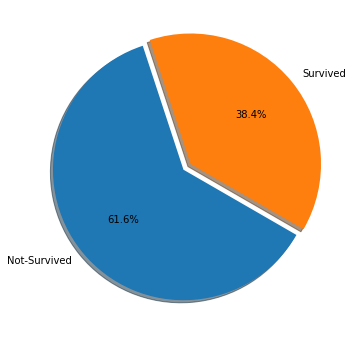

In [38]:
#Let us first analyze the distribution of the target variable

#MAP={}
#for e, i in enumerate(df[target].unique()):
#    MAP[i]=labels[e]
MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.07
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                               Visualising Categorical Features:                                


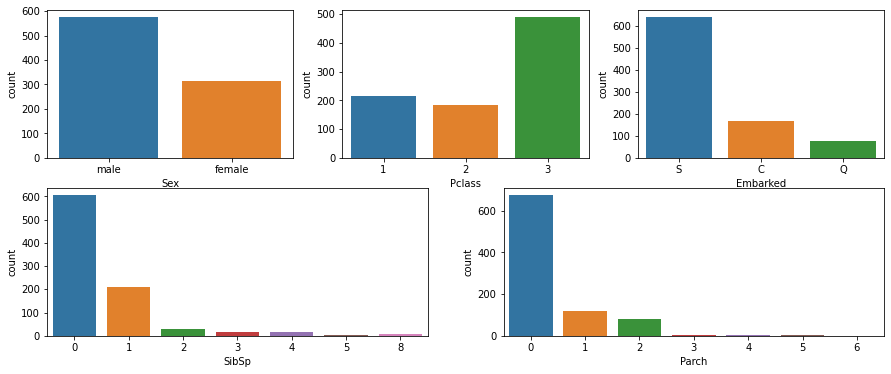

In [39]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/3),3,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,2,i)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** There are no categorical features to visualize.

                                     Features Distribution                                      


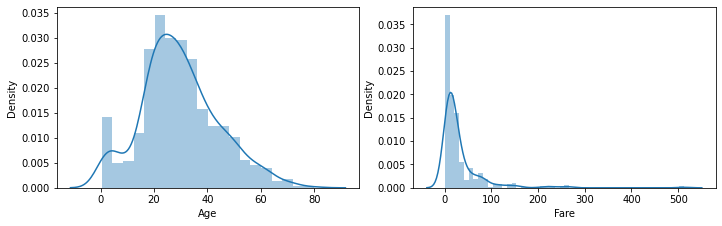

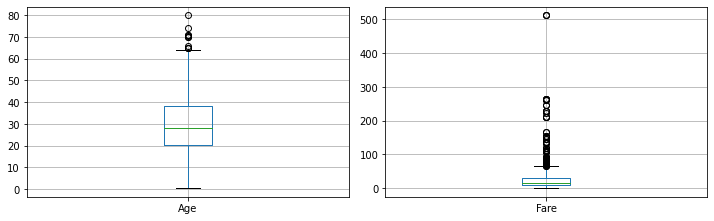

In [40]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

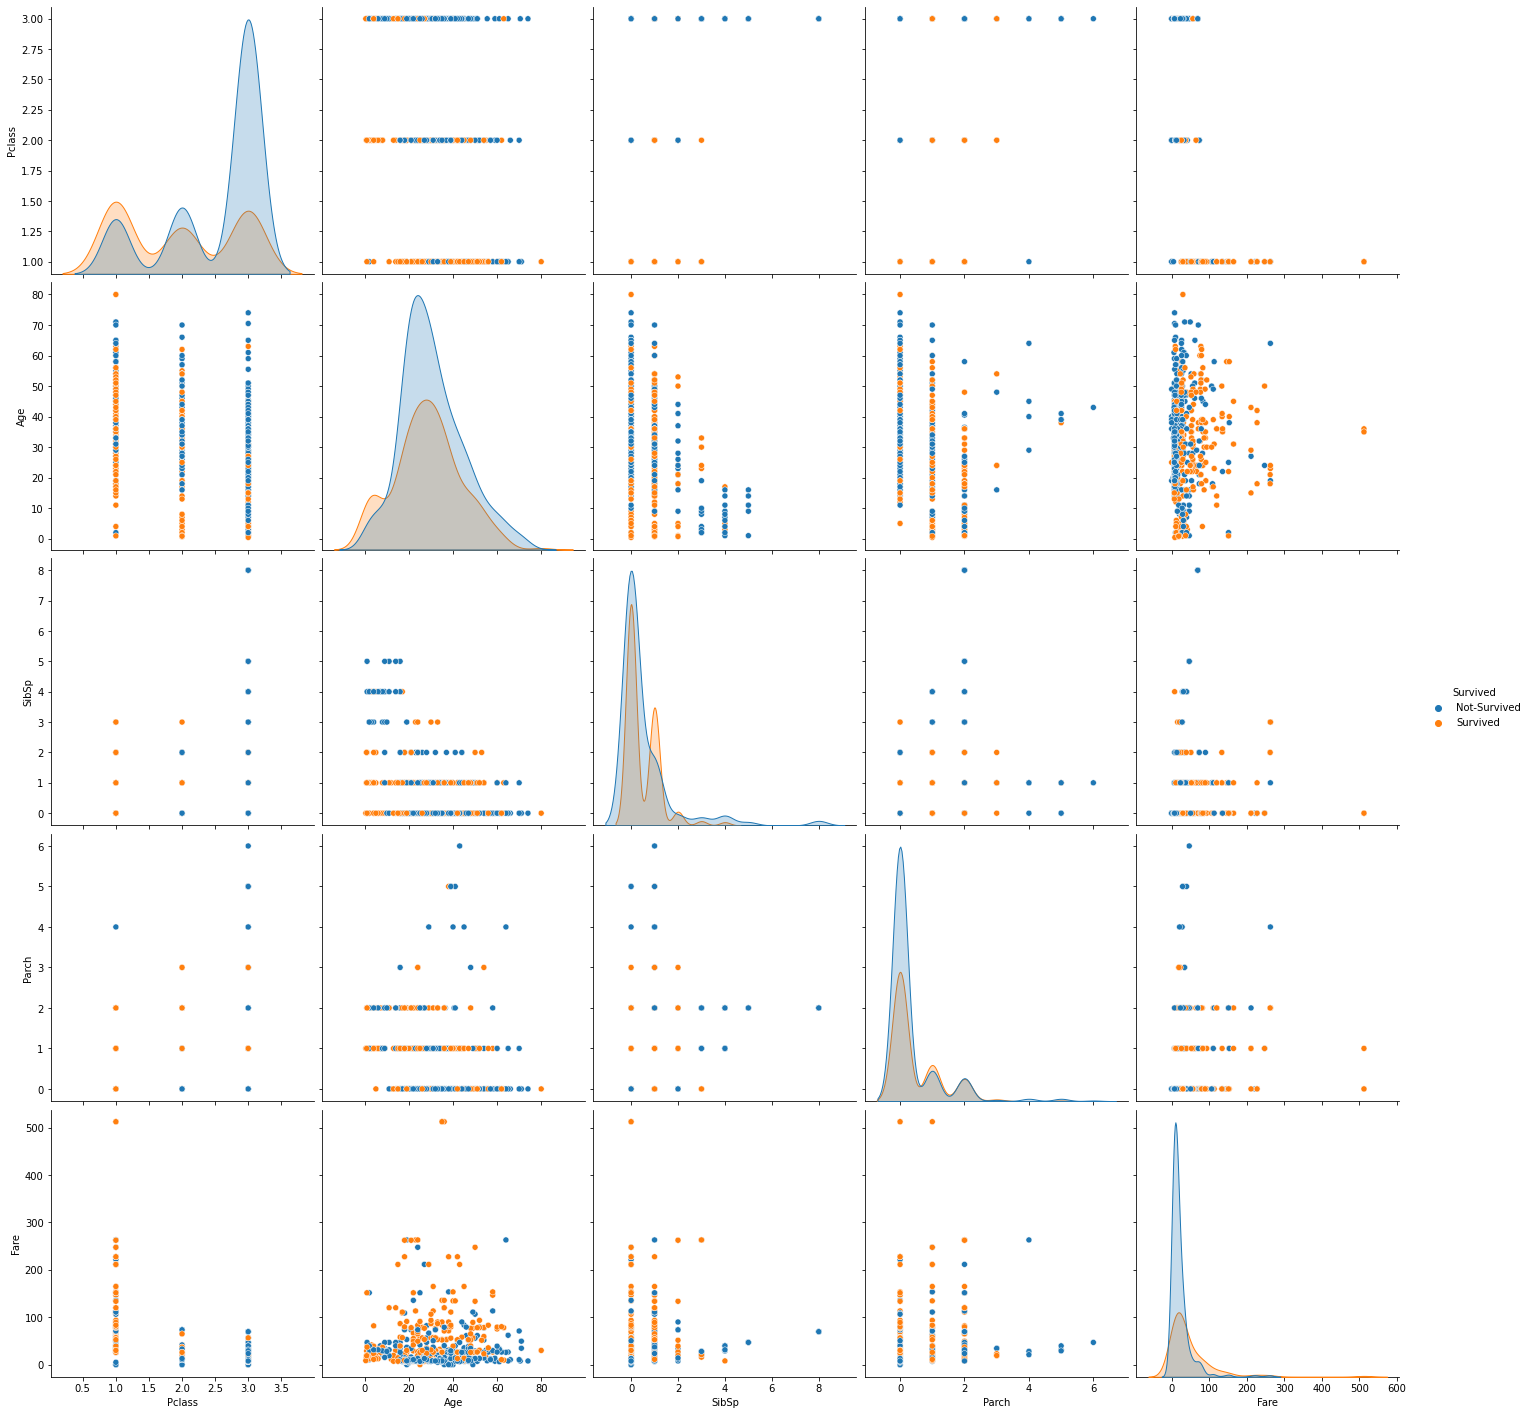

In [41]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
#g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [126]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Inference: The dataset doesn't have any null elements


In [128]:
# Fixing Embarked Column Null Values:

df = df[~df.Embarked.isnull()]
df.reset_index(drop=True, inplace=True)

In [129]:
#Converting categorical Columns to Numeric

df1 = df.copy()

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df1[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df1[i]=pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
    if (df1[i].nunique()>2 and df1[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df1 = pd.concat([df1.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df1[i], drop_first=True, prefix=str(i)))],axis=1)

Mapping Target variable ---> {0: 0, 1: 1}
One-Hot Encoding on features:
Sex

Dummy Encoding on features:
Pclass
Embarked
SibSp
Parch


In [130]:
df_x1 = df1[~df1['Age'].isnull()]
df_x2 = df1[df1.Age.isnull()]
Y = df_x1['Age']

poly_reg = PolynomialFeatures(degree=2)
X_poly1 = poly_reg.fit_transform(df_x1.drop(['Age'],axis=1))
X_poly2 = poly_reg.fit_transform(df_x2.drop(['Age'],axis=1))

LR = LinearRegression()
LR.fit(X_poly1, Y)
pred = LR.predict(X_poly2)

c=0
for i in range(df1.shape[0]):
    if df1.Age[i]!=df1.Age[i]:
        df1.loc[i,'Age']=pred[c]
        c+=1

In [132]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df2 = df1.copy()
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df2.shape[0]}')


Inference: Number of duplicates dropped ---> 107


In [135]:
#Removal of outlier:

df3 = df2.copy()

for i in [i for i in df3.columns]:
    if df3[i].nunique()>=12:
        Q1 = df3[i].quantile(0.05)
        Q3 = df3[i].quantile(0.95)
        IQR = Q3 - Q1
        df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
        df3 = df3[df3[i] >= (Q1-(1.5*IQR))]
df3 = df3.reset_index(drop=True)
display(df3.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df3.shape[0]))

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,1,22.0,7.2500,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,38.0,71.2833,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,35.0,53.1000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0



Inference: Before removal of outliers, The dataset had 889 samples.
Inference: After removal of outliers, The dataset now has 767 samples.


In [137]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    454
1    313
Name: Survived, dtype: int64

Class distribution after applying SMOTE Technique:
0    454
1    454
Name: Survived, dtype: int64


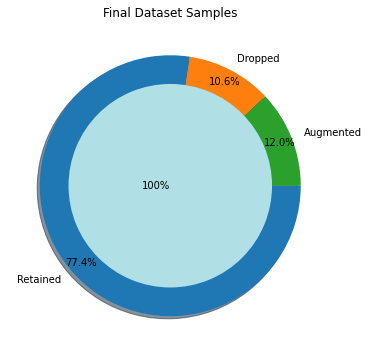


Inference:The final dataset after cleanup has 908 samples & 20 rows.


In [139]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [140]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (908, 19) (908,) 
Training set  --->  (726, 19) (726,) 
Testing set   --->  (182, 19)  (182,)


In [141]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.0,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02
mean,-6.361609e-17,1.957418e-17,1.957418e-17,-7.829672e-17,9.787090e-17,-8.686042e-17,3.914836e-17,3.425482e-17,2.446773e-17,-3.670159e-17,-1.835079e-17,-1.712741e-17,0.0,-2.446773e-17,-4.893545e-18,-2.936127e-17,-2.446773e-18,4.893545e-18,-4.893545e-18
std,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,0.0,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00,1.000689e+00
min,-1.139065e+00,-2.054057e+00,-8.076244e-01,-5.103104e-01,-9.463410e-01,-2.216595e-01,-1.588796e+00,-5.614422e-01,-1.683111e-01,-1.120371e-01,-1.501173e-01,-8.327552e-02,0.0,-3.903600e-01,-3.055708e-01,-8.327552e-02,-6.441566e-02,-7.443229e-02,-3.713907e-02
25%,-1.139065e+00,-6.188054e-01,-6.136772e-01,-5.103104e-01,-9.463410e-01,-2.216595e-01,-1.588796e+00,-5.614422e-01,-1.683111e-01,-1.120371e-01,-1.501173e-01,-8.327552e-02,0.0,-3.903600e-01,-3.055708e-01,-8.327552e-02,-6.441566e-02,-7.443229e-02,-3.713907e-02
50%,8.779133e-01,-5.430222e-02,-3.558841e-01,-5.103104e-01,-9.463410e-01,-2.216595e-01,6.294075e-01,-5.614422e-01,-1.683111e-01,-1.120371e-01,-1.501173e-01,-8.327552e-02,0.0,-3.903600e-01,-3.055708e-01,-8.327552e-02,-6.441566e-02,-7.443229e-02,-3.713907e-02
75%,8.779133e-01,6.447538e-01,1.174461e-01,-5.103104e-01,1.056702e+00,-2.216595e-01,6.294075e-01,-5.614422e-01,-1.683111e-01,-1.120371e-01,-1.501173e-01,-8.327552e-02,0.0,-3.903600e-01,-3.055708e-01,-8.327552e-02,-6.441566e-02,-7.443229e-02,-3.713907e-02
max,8.779133e-01,3.562914e+00,5.528786e+00,1.959592e+00,1.056702e+00,4.511423e+00,6.294075e-01,1.781127e+00,5.941380e+00,8.925619e+00,6.661456e+00,1.200833e+01,0.0,2.561738e+00,3.272564e+00,1.200833e+01,1.552417e+01,1.343503e+01,2.692582e+01



                                Standardardization on Testing set                                


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.0,182.000000,182.000000,1.820000e+02,182.000000,182.000000,1.820000e+02
mean,-0.086247,0.020681,0.042622,-0.035329,0.044175,0.194436,-0.199372,0.043507,-0.000462,0.036935,-0.037839,-8.327552e-02,0.0,-0.001072,-0.030330,-8.327552e-02,0.021236,-0.000204,-3.713907e-02
std,1.010294,1.009512,1.102831,0.976107,1.004223,1.343950,1.076052,1.028095,1.001419,1.153899,0.869680,1.391607e-17,0.0,1.001590,0.956094,1.391607e-17,1.155503,1.001388,6.958036e-18
min,-1.139065,-2.345062,-0.807624,-0.510310,-0.946341,-0.221660,-1.588796,-0.561442,-0.168311,-0.112037,-0.150117,-8.327552e-02,0.0,-0.390360,-0.305571,-8.327552e-02,-0.064416,-0.074432,-3.713907e-02
25%,-1.139065,-0.620442,-0.614249,-0.510310,-0.946341,-0.221660,-1.588796,-0.561442,-0.168311,-0.112037,-0.150117,-8.327552e-02,0.0,-0.390360,-0.305571,-8.327552e-02,-0.064416,-0.074432,-3.713907e-02
50%,0.877913,-0.051793,-0.458781,-0.510310,-0.946341,-0.221660,0.629408,-0.561442,-0.168311,-0.112037,-0.150117,-8.327552e-02,0.0,-0.390360,-0.305571,-8.327552e-02,-0.064416,-0.074432,-3.713907e-02
75%,0.877913,0.639254,-0.016652,-0.510310,1.056702,-0.221660,0.629408,1.781127,-0.168311,-0.112037,-0.150117,-8.327552e-02,0.0,-0.390360,-0.305571,-8.327552e-02,-0.064416,-0.074432,-3.713907e-02
max,0.877913,2.499765,5.528786,1.959592,1.056702,4.511423,0.629408,1.781127,5.941380,8.925619,6.661456,-8.327552e-02,0.0,2.561738,3.272564,-8.327552e-02,15.524175,13.435029,-3.713907e-02


---

## <center> 5. Feature Selection/Extraction

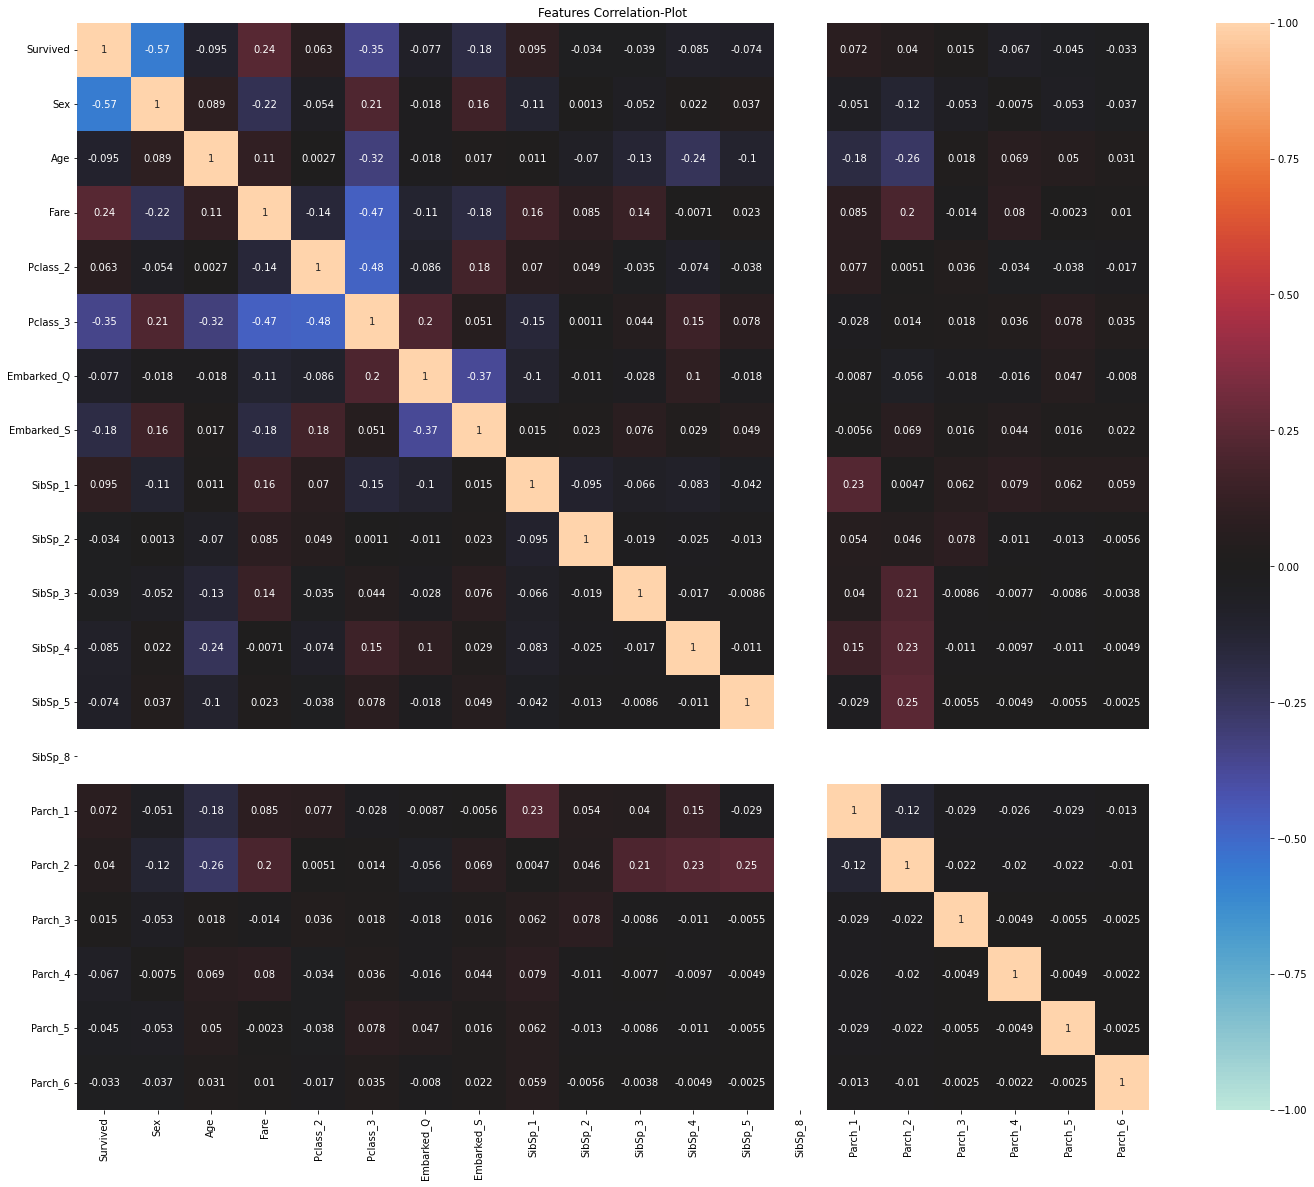

In [169]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. Especially in case of gender & survived.Hence it is clear that probably women were given more importance to save first. Similiary we have obvious strong correlation between fare & Passenger-Class. 

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

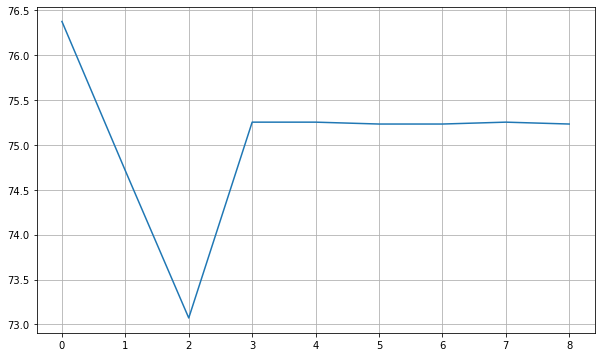

In [166]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-10):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>0.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

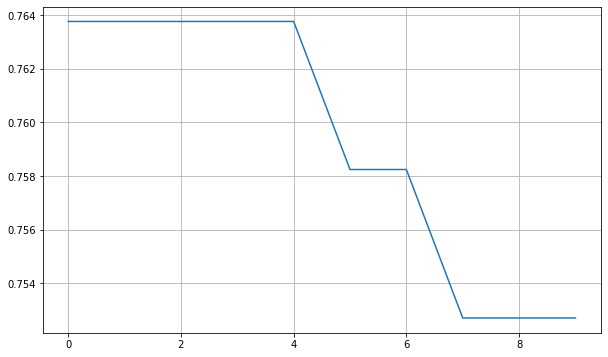

In [167]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(10):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

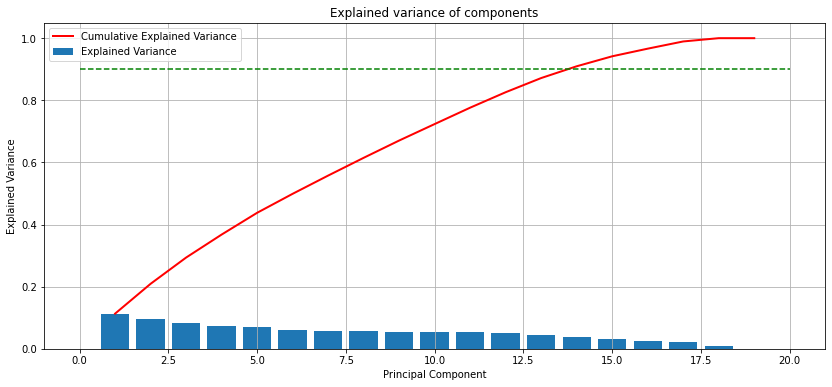

In [161]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
#plt.plot([10,10],[0,1],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

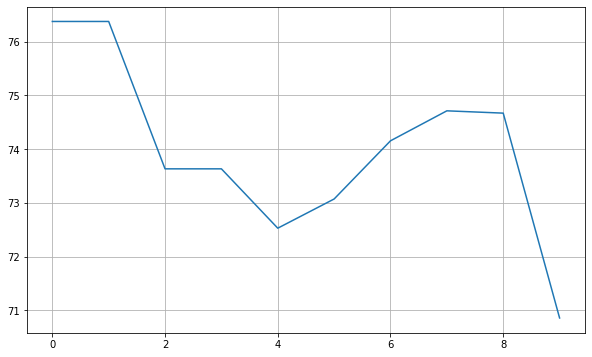

In [165]:
#Applying PCA Transformations

scores=[]
for i in range(10):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)

plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In VIF, RFE & PCA Techniques, we do not notice any better scores upon dropping some multicollinear features. Hence we shall not perform any feature selection/extraction.

---

## <center> 6. Predictive Modeling

In [170]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [171]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 76.4%
F1 Score = 77.0%

 Confusiton Matrix:
 [[67 21]
 [22 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76        88
           1       0.77      0.77      0.77        94

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



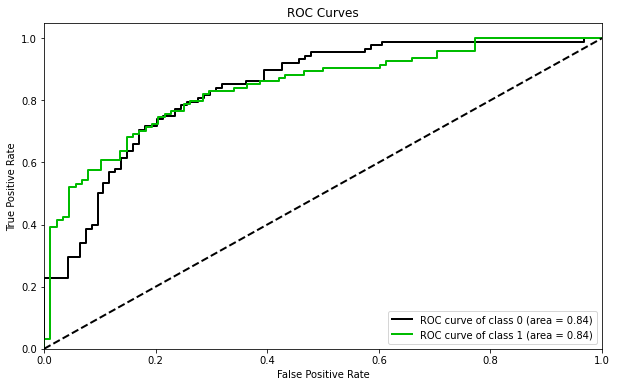


Interpreting the Output of Logistic Regression:

intercept  0.026610576819299445
classes [0 1]


,coeff
Sex,-1.352084
Age,-0.756009
Fare,-0.084279
Pclass_2,-0.575878
Pclass_3,-1.285889
Embarked_Q,-0.094350
Embarked_S,-0.195385
SibSp_1,-0.010406
SibSp_2,-0.149141
SibSp_3,-0.173183


In [173]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 74.2%
F1 Score = 77.10000000000001%

 Confusiton Matrix:
 [[56 32]
 [15 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.70        88
           1       0.71      0.84      0.77        94

    accuracy                           0.74       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.75      0.74      0.74       182



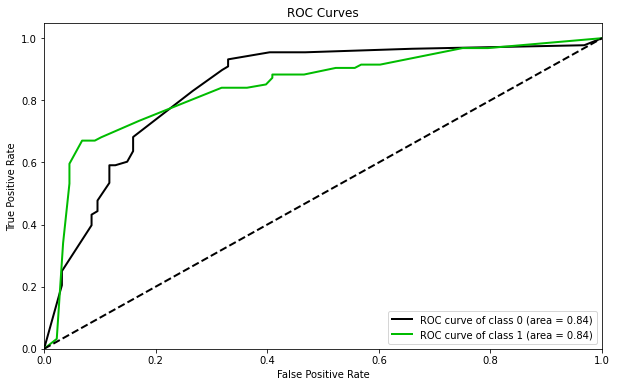


Interpreting the output of Decision Tree:



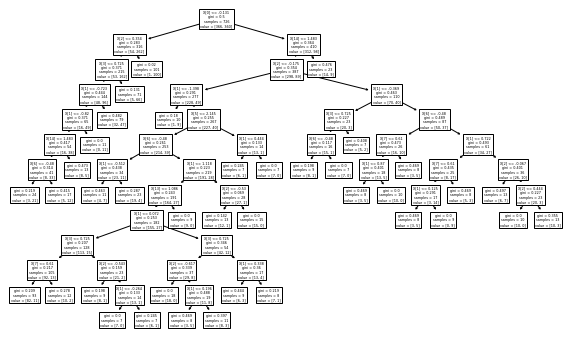

In [174]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 79.7%
F1 Score = 80.4%

 Confusiton Matrix:
 [[69 19]
 [18 76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        88
           1       0.80      0.81      0.80        94

    accuracy                           0.80       182
   macro avg       0.80      0.80      0.80       182
weighted avg       0.80      0.80      0.80       182



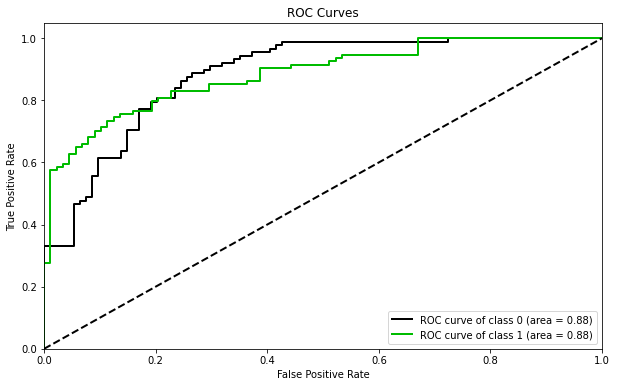


Interpreting the output of Random Forest:



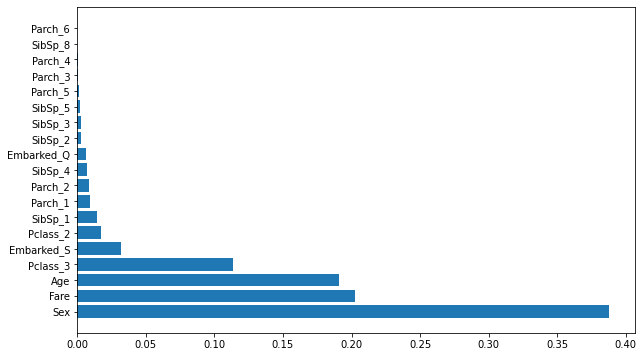

In [175]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 71.39999999999999%
F1 Score = 72.89999999999999%

 Confusiton Matrix:
 [[60 28]
 [24 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        88
           1       0.71      0.74      0.73        94

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



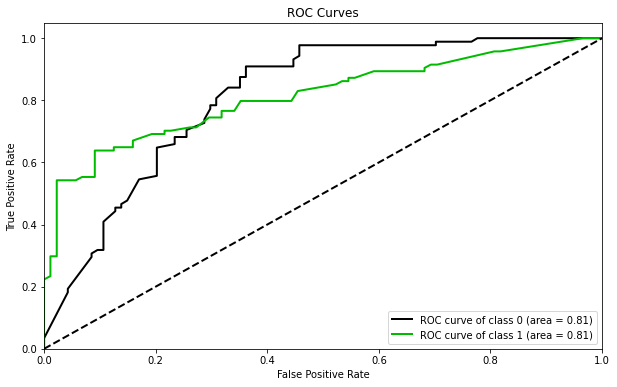

In [176]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 71.39999999999999%
F1 Score = 72.89999999999999%

 Confusiton Matrix:
 [[60 28]
 [24 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        88
           1       0.71      0.74      0.73        94

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



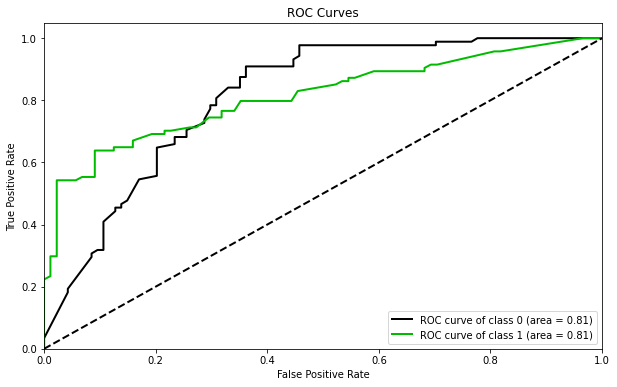

In [178]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 71.39999999999999%
F1 Score = 72.89999999999999%

 Confusiton Matrix:
 [[60 28]
 [24 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        88
           1       0.71      0.74      0.73        94

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



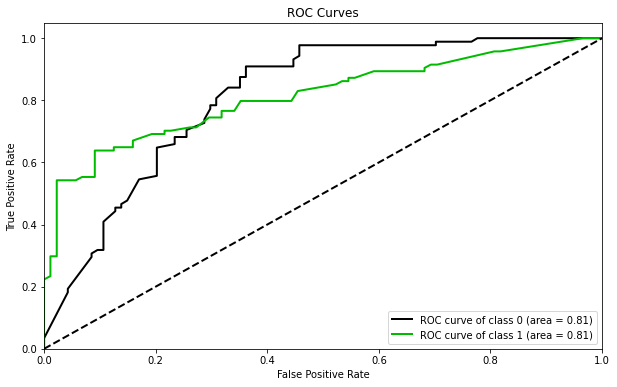

In [179]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 78.0%
F1 Score = 79.4%

 Confusiton Matrix:
 [[65 23]
 [17 77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        88
           1       0.77      0.82      0.79        94

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182



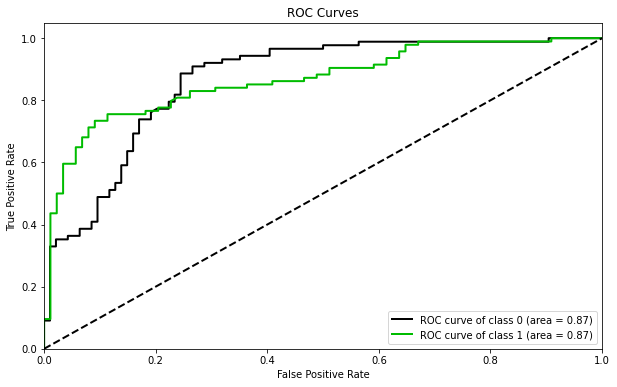

In [180]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[02:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 80.2%
F1 Score = 80.60000000000001%

 Confusiton Matrix:
 [[71 17]
 [19 75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        88
           1       0.82      0.80   

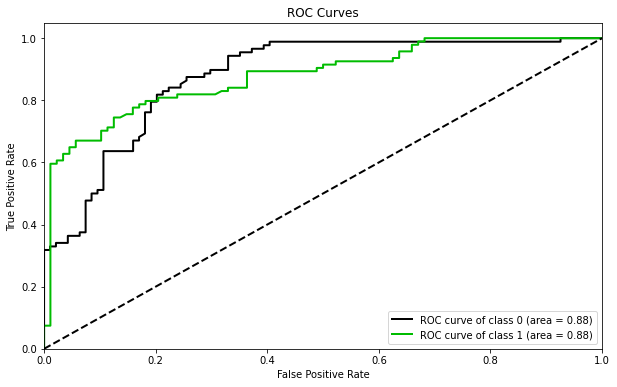

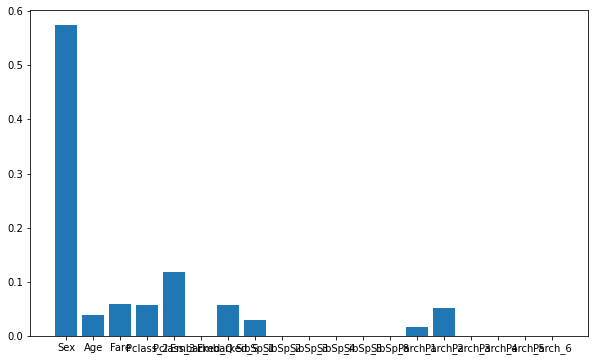

In [181]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

plt.bar( Train_X_std.columns,XGB.feature_importances_,)
plt.show()

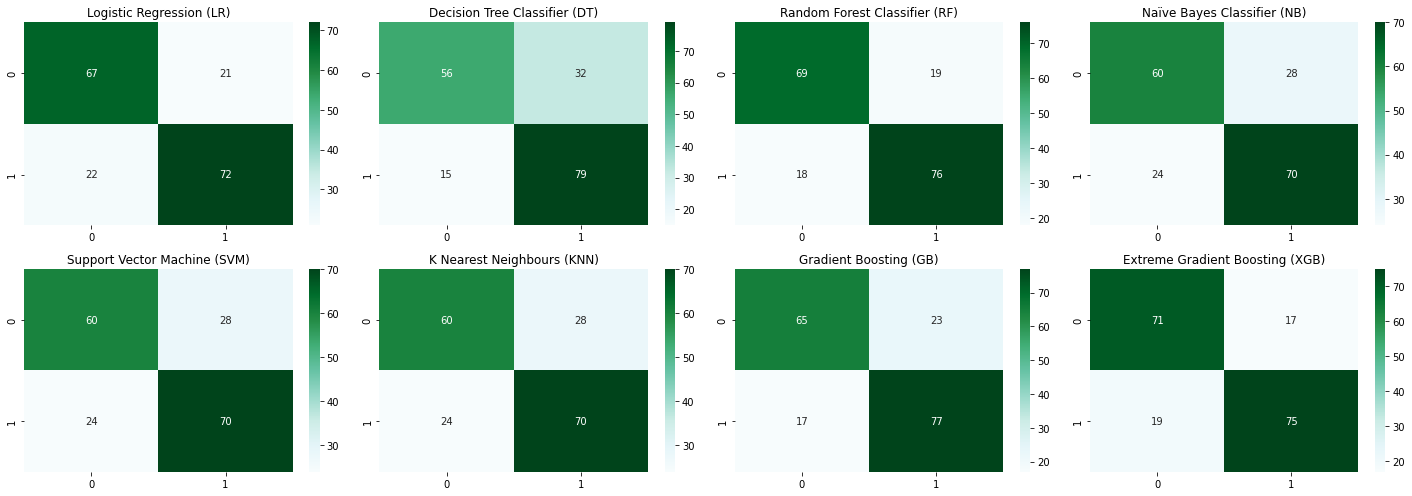

In [182]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

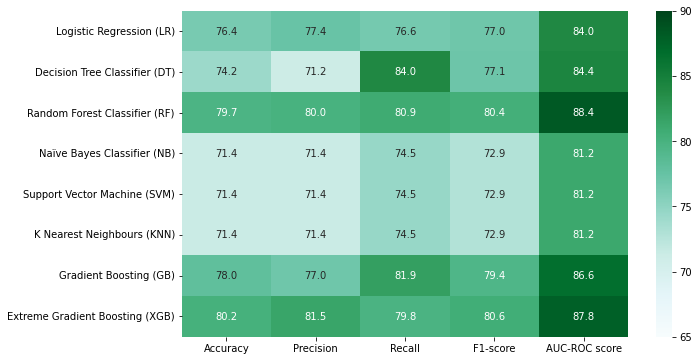

In [184]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=65, vmax=90, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. We can note from the above heatmap that the Boosting & RandomForest Models Performed well on the current dataset...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 88 thousand samples & after preprocessing 10.6% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 12.0% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was not carried out and appropriate features were not shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>